## Doctor's Consultation Fees Prediction

### Problem Statement:
Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records



### FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.



### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import scipy
import scipy.stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

### Renaming and Calling the dataset as dataframe

In [2]:
train=pd.read_csv('doctor_fees_train.csv')
test=pd.read_csv('doctor_fees_test.csv')

In [3]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [4]:
test['Fees']=np.nan

In [5]:
train.shape

(5961, 7)

In [6]:
train=pd.concat([train,test],axis=0)

In [7]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0


## Will use Regex for extracting perticular pattern from data¶


In [8]:
#Extract experience numbers from data
train['experience']=train.Experience.str.extract('(\d+)')

In [9]:
train.Place.value_counts()

HSR Layout, Bangalore       97
Andheri West, Mumbai        97
Dwarka, Delhi               93
Banjara Hills, Hyderabad    85
Mulund West, Mumbai         81
                            ..
Mankhurd, Mumbai             1
Kurla, Mumbai                1
Gottigerre, Bangalore        1
Moula Ali, Hyderabad         1
Bolarum, Hyderabad           1
Name: Place, Length: 948, dtype: int64

In [10]:
#Ectracting Place from data
train['place']=train.Place.str.extract(',\s([a-zA-Z]*)$')

In [11]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,experience,place
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,24,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,12,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,9,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,12,Bangalore
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,20,Chennai


In [12]:
train.Rating.value_counts()

100%    907
98%     402
99%     327
97%     325
96%     285
95%     225
94%     166
93%     143
92%      95
90%      95
91%      86
88%      54
89%      53
85%      35
82%      32
83%      32
86%      27
80%      26
87%      25
84%      20
67%      17
77%      17
71%      16
81%      15
79%      15
73%      13
76%      13
60%      11
75%       8
70%       8
78%       7
74%       7
69%       6
55%       5
56%       5
68%       5
64%       4
72%       3
57%       3
63%       2
33%       2
65%       2
53%       2
62%       2
47%       1
48%       1
36%       1
40%       1
52%       1
58%       1
7%        1
45%       1
Name: Rating, dtype: int64

In [13]:
#Extracting Rating 
train['rating']=train.Rating.str.extract('(\d+)')

In [14]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,experience,place,rating
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,24,Ernakulam,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,12,Bangalore,98
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,9,Bangalore,NaN
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,12,Bangalore,NaN
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,20,Chennai,100


In [15]:
# extracting usefull information from Qualification. As it contains various degree/diploma details. So lets search first
x=np.where(train.Qualification.str.contains('(MBBS|BDS|MD|MS|LCEH|DDVL|BAMS|BSAM|BHMS|DHMS|DNB|Get inspired)')==False)

In [16]:
#Checking what else doctor had done other than above mentioned degree.s
for i in x:
    print(train.iloc[i,:].Qualification)

104     PhD - Orthodontics & Dentofacial Orthopaedics,...
224                                                  GCEH
753                                   39 years experience
829     Diplomate of National Board Exam, Diploma in O...
1030                 Diploma in Otorhinolaryngology (DLO)
1064              GCEH, Certificate in Child Health (CCH)
1265                               Diploma in Dermatology
1297                                              G.A.M.S
2005                                              G.A.M.S
2035    Fellowship in Oral implantlogy, Certified Adva...
2975                                           M.D. (E.H)
4503                                                  DDV
4757    Diploma in Otorhinolaryngology (DLO), Diploma ...
5182                                              G.A.M.S
443                                FRCS - General Surgery
471                                            FWFO, FPFA
1139                               Diploma in Dermatology
1159          

In [17]:
# Making extra columns for each degree's
train['MBBS']=train.Qualification.str.extract('(MBBS)')
train['BDS']=train.Qualification.str.extract('(BDS)')
train['MD']=train.Qualification.str.extract('(MD)')
train['MS']=train.Qualification.str.extract('(MS)')
train['LCEH']=train.Qualification.str.extract('(LCEH)')
train['DDVL']=train.Qualification.str.extract('(DDVL)')
train['BAMS']=train.Qualification.str.extract('(BAMS)')
train['BSAM']=train.Qualification.str.extract('(BSAM)')
train['BHMS']=train.Qualification.str.extract('(BHMS)')
train['DHMS']=train.Qualification.str.extract('(DHMS)')
train['DNB']=train.Qualification.str.extract('(DNB)')
train['Get']=train.Qualification.str.extract('(Get inspired)')

In [18]:
train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees', 'experience', 'place', 'rating', 'MBBS',
       'BDS', 'MD', 'MS', 'LCEH', 'DDVL', 'BAMS', 'BSAM', 'BHMS', 'DHMS',
       'DNB', 'Get'],
      dtype='object')

In [19]:
#Replaceing NA in created dree's columns with 0
train.iloc[:,10:22]=train.iloc[:,10:22].fillna(0)

In [20]:
#Replaceing each degree with 1
train.iloc[:,10:22]=train.iloc[:,10:22].replace({'MBBS':1,
       'BDS':1,'MD':1,'MS':1,'LCEH':1,'DDVL':1,'BAMS':1,'BSAM':1,'BHMS':1,'DHMS':1,
       'DNB':1,'Get':1})

In [21]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,experience,place,rating,...,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,24,Ernakulam,100,...,1,1,0,0,0,0,1,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,12,Bangalore,98,...,1,1,0,0,1,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,9,Bangalore,NaN,...,0,1,0,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,12,Bangalore,NaN,...,0,1,0,0,1,0,0,0,0,0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,20,Chennai,100,...,0,1,0,0,1,0,0,0,0,0


In [22]:
#Choosing attributes which we will use for ML
attributes = ['Profile', 'Fees' , 'experience','place','rating','MBBS','BDS','MD','MS','LCEH','DDVL',
              'BAMS','BSAM','BHMS','DHMS','DNB','Get']

In [23]:
train=train[attributes]

In [24]:
#Final dataframe with missing values
train.head()

,Profile,Fees,experience,place,rating,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,Homeopath,100.0,24,Ernakulam,100,0,0,1,1,0,0,0,0,1,0,0,0
1,Ayurveda,350.0,12,Bangalore,98,0,0,1,1,0,0,1,0,0,0,0,0
2,ENT Specialist,300.0,9,Bangalore,NaN,1,0,0,1,0,0,0,0,0,0,0,0
3,Ayurveda,250.0,12,Bangalore,NaN,0,0,0,1,0,0,1,0,0,0,0,0
4,Ayurveda,250.0,20,Chennai,100,0,0,0,1,0,0,1,0,0,0,0,0


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Profile     7948 non-null   object 
 1   Fees        5961 non-null   float64
 2   experience  7948 non-null   object 
 3   place       7916 non-null   object 
 4   rating      3556 non-null   object 
 5   MBBS        7948 non-null   int64  
 6   BDS         7948 non-null   int64  
 7   MD          7948 non-null   int64  
 8   MS          7948 non-null   int64  
 9   LCEH        7948 non-null   int64  
 10  DDVL        7948 non-null   int64  
 11  BAMS        7948 non-null   int64  
 12  BSAM        7948 non-null   int64  
 13  BHMS        7948 non-null   int64  
 14  DHMS        7948 non-null   int64  
 15  DNB         7948 non-null   int64  
 16  Get         7948 non-null   object 
dtypes: float64(1), int64(11), object(5)
memory usage: 1.1+ MB


## Checking Correlation target and feature columns¶


In [26]:
corr_mat=train.corr()

In [27]:
corr_mat['Fees'].sort_values(ascending=False)

Fees    1.000000
MBBS    0.271038
DNB     0.140918
MD      0.095383
DDVL    0.071667
DHMS    0.015443
LCEH    0.004635
BHMS   -0.002423
MS     -0.003847
BSAM   -0.018105
BAMS   -0.139891
BDS    -0.198635
Name: Fees, dtype: float64

- From above heatmap we can say that MBBS has good correlation with Target¶


In [28]:
train.head()

,Profile,Fees,experience,place,rating,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,Homeopath,100.0,24,Ernakulam,100,0,0,1,1,0,0,0,0,1,0,0,0
1,Ayurveda,350.0,12,Bangalore,98,0,0,1,1,0,0,1,0,0,0,0,0
2,ENT Specialist,300.0,9,Bangalore,NaN,1,0,0,1,0,0,0,0,0,0,0,0
3,Ayurveda,250.0,12,Bangalore,NaN,0,0,0,1,0,0,1,0,0,0,0,0
4,Ayurveda,250.0,20,Chennai,100,0,0,0,1,0,0,1,0,0,0,0,0


In [29]:
train.Profile=train.Profile.astype('category')

## Lets put experience columns into groups¶


In [30]:
train.experience.value_counts()

9     419
10    404
8     380
11    374
12    358
     ... 
64      1
66      1
60      1
61      1
58      1
Name: experience, Length: 64, dtype: int64

In [31]:
train.experience=train.experience.astype('int64')

array([[<AxesSubplot:title={'center':'experience'}>]], dtype=object)

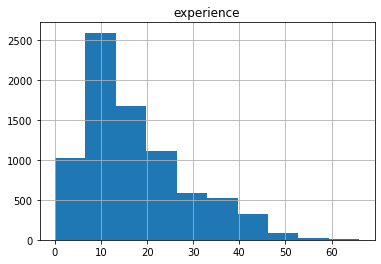

In [32]:
train.hist('experience')

In [33]:
y=train.groupby('experience')['Fees'].mean()
y

experience
0     197.931034
2     240.579710
3     257.747748
4     273.643478
5     292.553191
         ...    
60    100.000000
61    100.000000
64    100.000000
65    100.000000
66    100.000000
Name: Fees, Length: 64, dtype: float64

In [34]:
a=[1,2,3,4,5,6,7,8]
train['experience']=pd.cut(train.experience,bins=[0,3,8,14,26,36,45,50,66],labels=a,right=False)

In [35]:
train.head()

,Profile,Fees,experience,place,rating,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,Homeopath,100.0,4,Ernakulam,100,0,0,1,1,0,0,0,0,1,0,0,0
1,Ayurveda,350.0,3,Bangalore,98,0,0,1,1,0,0,1,0,0,0,0,0
2,ENT Specialist,300.0,3,Bangalore,NaN,1,0,0,1,0,0,0,0,0,0,0,0
3,Ayurveda,250.0,3,Bangalore,NaN,0,0,0,1,0,0,1,0,0,0,0,0
4,Ayurveda,250.0,4,Chennai,100,0,0,0,1,0,0,1,0,0,0,0,0


In [36]:
train.isnull().sum()

Profile          0
Fees          1987
experience       1
place           32
rating        4392
MBBS             0
BDS              0
MD               0
MS               0
LCEH             0
DDVL             0
BAMS             0
BSAM             0
BHMS             0
DHMS             0
DNB              0
Get              0
dtype: int64

In [37]:
train.rating.isnull().sum()

4392

- Since Rating have lot of missing values so dropping it¶

In [38]:
del train['rating']

In [39]:
# Filling missing values
train[train.experience.isnull()==True]

,Profile,Fees,experience,place,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
372,ENT Specialist,100.0,NaN,Chennai,1,0,0,0,0,0,0,0,0,0,0,0


In [40]:
train.experience=train.experience.fillna(8)

In [41]:
#Fill missing values
train.place=train.place.fillna('no_city')

## Seperating test and train data :-


In [42]:
test=train.iloc[5962:,:]

In [43]:
train=train.iloc[:5961,:]

In [44]:
train.shape

(5961, 16)

In [45]:
train.head()

,Profile,Fees,experience,place,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,DNB,Get
0,Homeopath,100.0,4,Ernakulam,0,0,1,1,0,0,0,0,1,0,0,0
1,Ayurveda,350.0,3,Bangalore,0,0,1,1,0,0,1,0,0,0,0,0
2,ENT Specialist,300.0,3,Bangalore,1,0,0,1,0,0,0,0,0,0,0,0
3,Ayurveda,250.0,3,Bangalore,0,0,0,1,0,0,1,0,0,0,0,0
4,Ayurveda,250.0,4,Chennai,0,0,0,1,0,0,1,0,0,0,0,0


In [46]:
train.place=train.place.astype('category')

In [47]:
test.place=test.place.astype('category')
# Hot encoding
train=pd.get_dummies(train)

In [48]:
train_label=train.Fees
del train['Fees']

In [49]:
test=pd.get_dummies(test)

In [50]:
train.head()

,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,...,place_Chennai,place_Coimbatore,place_Delhi,place_Ernakulam,place_Hyderabad,place_Mumbai,place_Thiruvananthapuram,place_no_city,Get_0,Get_Get inspired
0,0,0,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5961 entries, 0 to 5960
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   MBBS                      5961 non-null   int64
 1   BDS                       5961 non-null   int64
 2   MD                        5961 non-null   int64
 3   MS                        5961 non-null   int64
 4   LCEH                      5961 non-null   int64
 5   DDVL                      5961 non-null   int64
 6   BAMS                      5961 non-null   int64
 7   BSAM                      5961 non-null   int64
 8   BHMS                      5961 non-null   int64
 9   DHMS                      5961 non-null   int64
 10  DNB                       5961 non-null   int64
 11  Profile_Ayurveda          5961 non-null   uint8
 12  Profile_Dentist           5961 non-null   uint8
 13  Profile_Dermatologists    5961 non-null   uint8
 14  Profile_ENT Specialist    5961 non-null 

In [52]:
del test['Fees']

In [53]:
train.shape

(5961, 36)

In [54]:
train['Fees']=train_label
train.head()

,MBBS,BDS,MD,MS,LCEH,DDVL,BAMS,BSAM,BHMS,DHMS,...,place_Coimbatore,place_Delhi,place_Ernakulam,place_Hyderabad,place_Mumbai,place_Thiruvananthapuram,place_no_city,Get_0,Get_Get inspired,Fees
0,0,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,100.0
1,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,350.0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,300.0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,250.0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,250.0


In [55]:
# Split data into train and test
df=train
df_label=df['Fees']
from sklearn.model_selection import train_test_split
train , val = train_test_split(train,test_size=0.20,random_state=99)

In [56]:
train.shape

(4768, 37)

In [57]:
train_label=train.Fees
val_label=val.Fees
del train['Fees']
del val['Fees']

In [58]:
del df['Fees']

## Testing Models :-

In [59]:
# defining a function to calculate RMSLE 

def rmsle(predict,real):
    x=np.sqrt(np.mean(np.power((np.log10(real+1)-np.log10(predict+1)),2)))
    return(x,np.std(x))

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
#Cross Vald function
def func(estimator,data,label,folds):
    score=cross_val_score(estimator,train,train_label,cv=folds, scoring='neg_mean_squared_error')
    rmse=np.sqrt(-score)
    return(rmse)

## Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lr=LinearRegression()

In [64]:
score_lr=func(lr,df,df_label,10)

In [65]:
score_lr.mean()

174.01057534893923

In [66]:
lr.fit(df,df_label)
total=lr.predict(val)

In [67]:
rmsle_lr,std_lr=rmsle(total,val_label)
rmsle_lr,std_lr

(0.27899244621307057, 0.0)

## DecisionTreeRegressor

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
dtr=DecisionTreeRegressor()

In [70]:
score_dtr=func(dtr,df,df_label,10)

In [71]:
score_dtr.mean()

185.82168533630445

In [72]:
dtr.fit(train,train_label)
score=dtr.predict(val)
rmsle_dtr,std_dtr=rmsle(score,val_label)
rmsle_dtr,std_dtr

(0.2924333210531761, 0.0)

## SVM

In [73]:
from sklearn.svm import SVR

In [74]:
svm=SVR(kernel='rbf',gamma=0.05,C=70)

In [75]:
score_svm=func(svm,df,df_label,10)

In [76]:
score_svm.mean()

174.20217539017125

In [77]:
svm.fit(train,train_label)
score=svm.predict(val)
rmsle_svm,std_svm=rmsle(score,val_label)
rmsle_svm,std_svm

(0.27170146815699076, 0.0)

## KNeighborsRegressor

In [78]:
from sklearn.neighbors import KNeighborsRegressor
score_knn=[]
for k in range(30,70):
    knn=KNeighborsRegressor(k,algorithm='auto')
    score=func(knn,df,df_label,10)
    score=score.mean()
    score_knn.append(score)

In [79]:
pd.Series(score_knn,index=range(30,70)).sort_values()

60    173.365711
68    173.392116
63    173.393645
50    173.400542
52    173.439009
62    173.443593
51    173.450811
54    173.484732
48    173.524762
45    173.524780
61    173.531636
46    173.535659
47    173.535700
49    173.554453
65    173.564180
66    173.566434
58    173.572147
69    173.577878
67    173.585766
64    173.594632
59    173.609427
55    173.621011
44    173.622076
43    173.624669
53    173.650646
56    173.680817
57    173.747958
36    173.766404
35    173.770860
37    173.837900
38    173.858524
41    173.890697
42    173.899327
39    173.960396
40    173.977411
32    174.010767
33    174.067927
30    174.290188
34    174.320144
31    174.367688
dtype: float64

In [80]:
knn=KNeighborsRegressor(40,algorithm='auto')
score=func(knn,train,train_label,10)
score_knn=score.mean()

In [81]:
score_knn

173.97741050804035

In [82]:
knn.fit(train,train_label)
score=knn.predict(val)
rmsle_knn,std_knn=rmsle(score,val_label)
rmsle_knn,std_knn

(0.28344845056389734, 0.0)

## RandomForest

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=17)
score=func(rf,df,df_label,10)
score_rf=score.mean()
score_rf

178.73584078500846

In [84]:
rf.fit(train,train_label)
score=rf.predict(val)
rmsle_rf,std_rf=rmsle(score,val_label)
rmsle_rf,std_rf

(0.28538627057008303, 0.0)

## Extra Tree¶


In [85]:
from sklearn.tree import ExtraTreeRegressor
etr=ExtraTreeRegressor(random_state=13)
score=func(etr,df,df_label,10)
score_etr=score.mean()
score_etr

185.89583950545904

In [86]:
etr.fit(train,train_label)
score=etr.predict(val)
rmsle_etr,std_etr=rmsle(score,val_label)
rmsle_etr,std_etr

(0.29244089235337967, 0.0)

## ADA

In [87]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=200)
score=func(ada,df,df_label,10)
score_ada=score.mean()
score_ada

179.77105615992886

In [88]:
ada.fit(train,train_label)
score=ada.predict(val)
rmsle_ada,std_ada=rmsle(score,val_label)
rmsle_ada,std_ada

(0.30293838808923196, 0.0)

## Gradient

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
score=func(gbr,df,df_label,10)
score_gb=score.mean()
score_gb

171.51869247642597

In [90]:
gbr.fit(train,train_label)
score=gbr.predict(val)
rmsle_gb,std_gb=rmsle(score,val_label)
rmsle_gb,std_gb

(0.27612818174030634, 0.0)

In [91]:
imp=pd.DataFrame(rf.feature_importances_ ,index=train.columns)

<AxesSubplot:>

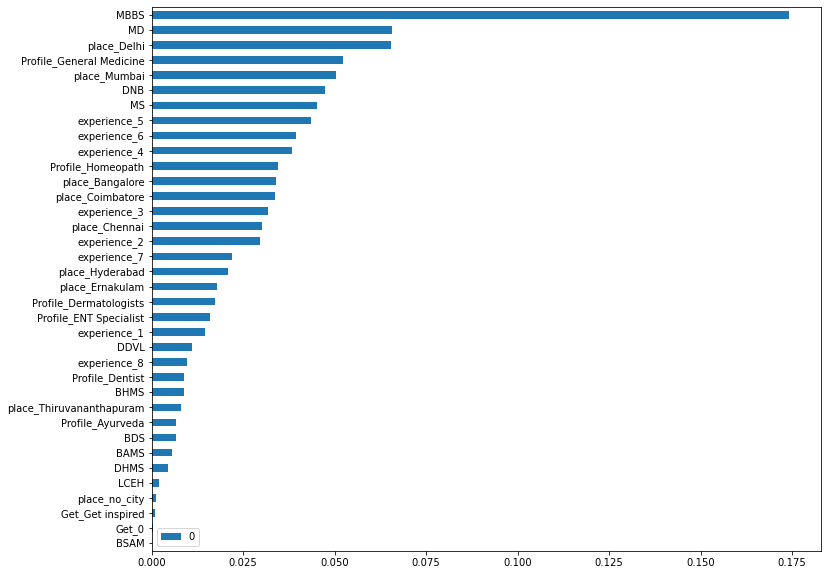

In [92]:
imp.sort_values(by=0).plot.barh(figsize=(12,10))

## Saving the model

In [93]:
import pickle

filename='pickledtcfile.pkl'
pickle.dump(dtr,open('pickledtcfile','wb'))

In [94]:
saved_model=pickle.load(open('pickledtcfile','rb'))
saved_model.predict(test)

array([400.        , 450.        , 150.        , ..., 371.42857143,
       226.19047619, 324.13793103])